Breast cancer prediction using Artificial neural network

In [ ]:
#importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
#Data Loading and Preprocessing

In [ ]:
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data_frame=pd.DataFrame(breast_cancer_dataset.data,columns= breast_cancer_dataset.feature_names)

In [ ]:
data_frame.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_frame['label']=breast_cancer_dataset.target

In [ ]:
data_frame.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
data_frame['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
 #separating features and targets in two different variables

In [ ]:


x=data_frame.drop(columns='label',axis=1)

In [ ]:
y=data_frame['label']

In [ ]:

print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [ ]:
#splitting the data into train test splits

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=2)

stardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #loading the standard scaler function into the variable scaler
X_train_std= scaler.fit_transform(X_train) #fit transform function is a combination of fit and transform,fit will learn parameters like mean,standard deviation from data and then transform in into standardize values,all values in same range.
X_test_std= scaler.transform(X_test) #we dont use fit with test data because we dont want the model to train from data we use for testing,we want it to be unseen

In [ ]:
print(X_train_std)
print(X_test_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]
[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [ ]:
print(x.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


In [ ]:





#Building a neural network

In [ ]:
 import tensorflow as tf #importing tensor flow library

In [ ]:
tf.random.set_seed(3) #we set random seed to initialize neural network with random weights and bias,each time the neural network runs,it give different accuracy,to avoid this the random seed will help,after setting this no matter how many times u run neural network,u will have same accuracy every time

In [ ]:
from tensorflow import keras # importing keras from tensor flow

In [ ]:
#setting layers of neural network

In [ ]:
model= keras.Sequential([keras.layers.Flatten(input_shape=(30,)), # converting features into single dimention
                         keras.layers.Dense(20,activation='relu'), # 20 neurons in hidden layer,Dense means fully connected neural network
                         keras.layers.Dense(2,activation='sigmoid')]) #2 classes so 2 neurons in output layers

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the neural network

In [ ]:
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training the model

In [ ]:
history=model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10) #epoch means iteration,validation split means how much data from training to use for testing/validation

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6332 - loss: 0.7298 - val_accuracy: 0.8043 - val_loss: 0.3839
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8026 - loss: 0.4982 - val_accuracy: 0.9130 - val_loss: 0.2680
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8566 - loss: 0.3639 - val_accuracy: 0.9348 - val_loss: 0.2085
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8897 - loss: 0.2802 - val_accuracy: 0.9565 - val_loss: 0.1756
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9162 - loss: 0.2255 - val_accuracy: 0.9565 - val_loss: 0.1553
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9332 - loss: 0.1887 - val_accuracy: 0.9783 - val_loss: 0.1416
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9549 - loss: 0.1639 - val_accuracy: 0.9783 - val_loss: 0.1317
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9558 - loss: 0.1467 - val_accuracy: 0.9783 - val_lo

Visualizing accuracy and loss

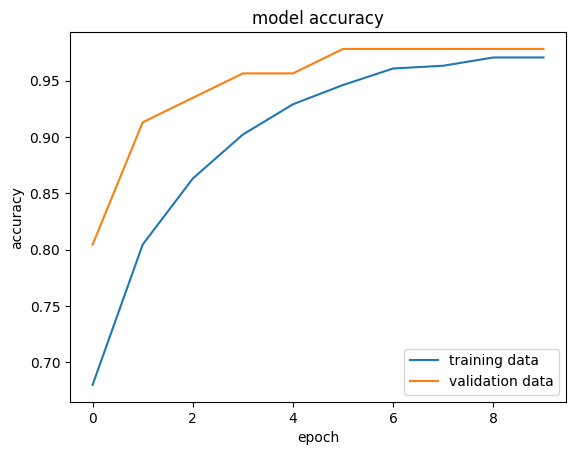

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data','validation data'],loc= 'lower right')

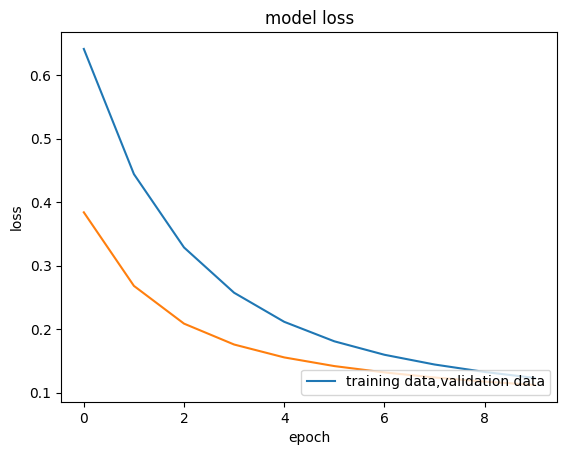

In [ ]:
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['training data,validation data'],loc='lower right')


Testing the accuracy of the model on test data

In [ ]:
loss,accuracy= model.evaluate(X_test_std,Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9414 - loss: 0.1281 
0.9473684430122375


In [ ]:
print(X_test_std.shape)

(114, 30)


In [ ]:
print(X_test_std[0]) #first data point

[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [ ]:
y_pred=model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
print(y_pred.shape)

(114, 2)


In [ ]:
print(y_pred[0])

[0.29017273 0.80970883]


In [ ]:
 print(y_pred) # these are probabi;itites of each datapoint,like 0.89 means 89 percent probability that it belongs to class 1 and 0.12 means 12 percent probability of belonging to class 0

[[0.29017273 0.80970883]
 [0.48980558 0.42182732]
 [0.05514976 0.90790886]
 [0.99876374 0.00351379]
 [0.44694012 0.48160413]
 [0.9878227  0.00855572]
 [0.38298675 0.5898499 ]
 [0.0623307  0.9262537 ]
 [0.1429149  0.82571036]
 [0.13146217 0.84946585]
 [0.39958435 0.5471661 ]
 [0.10874528 0.8051903 ]
 [0.27556333 0.6651879 ]
 [0.30073634 0.6966752 ]
 [0.10412243 0.8294637 ]
 [0.9037543  0.10101218]
 [0.05780642 0.90648407]
 [0.15294085 0.84578633]
 [0.10653561 0.8512055 ]
 [0.9528841  0.01562892]
 [0.38012803 0.5305224 ]
 [0.07556996 0.89587736]
 [0.06662947 0.9360925 ]
 [0.0866381  0.88770986]
 [0.205242   0.722909  ]
 [0.9171516  0.05460028]
 [0.22872053 0.70982635]
 [0.44764984 0.57484865]
 [0.9227059  0.06372452]
 [0.93436825 0.05462983]
 [0.15959007 0.82010025]
 [0.15887277 0.8316318 ]
 [0.10734832 0.8539713 ]
 [0.9978541  0.00101382]
 [0.96233004 0.04234612]
 [0.13361245 0.76273435]
 [0.04739223 0.9541366 ]
 [0.33568594 0.66304684]
 [0.06453349 0.92622757]
 [0.1820518  0.82775867]
